<a href="https://colab.research.google.com/github/sbchengyiwei/Berkeley-CS61B-fa20/blob/main/Submit_NEU_CS6220_Colab_3_3_Principle_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-01-27 07:10:07--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K   659KB/s    in 0.3s    

2023-01-27 07:10:08 (659 KB/s) - ‘abalone.csv’ saved [191962/191962]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read in Abalone data

In [ ]:
df = pd.read_csv("abalone.csv")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [ ]:
matrix = df.loc[:, df.columns != "Sex"]

from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(matrix)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [73]:
finalDf = pd.concat([principalDf, df[['Sex']]], axis = 1)

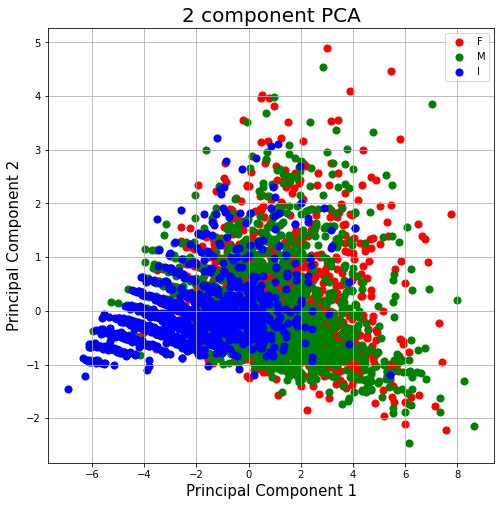

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['F', 'M', 'I']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [76]:
pca.explained_variance_ratio_

array([0.83905489, 0.08695162])